<a href="https://colab.research.google.com/github/Emelsmsk/sarap_kalitesi1/blob/main/sarap_kalitesi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Şarap Kalitesi Tahmini**: Makine Öğrenmesi Algoritmalarının Performans Analizi:
Bu çalışmada Kaggle üzerinden alınmış olan “Wine Quality” adlı veri kullanılarak sınıflama algoritmaları test edilmiştir.
Wine Quality verisinde 12 değişken bulunuyor. Başlıkları ve temsil ettikleri özellikler:

1-**Sabit asitlik:** Şarapla ilişkili olan ve uçucu olmayan asitlerin miktarını temsil eder. Yani kolayca buharlaşmazlar.
2-**Uçucu asitlik:** Şarapta bulunan asetik asit miktarını gösterir. Yüksek seviyelerde hoş olmayan bir sirke tadına neden olabilir.
3-**Sitrik asit:** Şarapta küçük miktarlarda bulunabilen, tazelik ve lezzet katan bir asittir.
4-**Kalan şeker:** Fermantasyon durduktan sonra kalan şeker miktarını temsil eder. Genellikle 1 gram/litre altında şeker içeren şaraplar nadirdir ve 45 gram/litre üzerindeki şaraplar tatlı olarak kabul edilir.
5-**Klorürler:** Şaraptaki tuz miktarını ifade eder.
6-**Serbest sülfür dioksit:** SO2'nin serbest formu, moleküler SO2 (çözünmüş gaz olarak) ve bisülfit iyonu arasında denge halinde bulunur. Mikrobiyal büyümeyi önler ve şarabın oksidasyonunu engeller.
7-**Toplam sülfür dioksit**: Serbest ve bağlı SO2 formlarının toplam miktarını temsil eder. Düşük konsantrasyonlarda, SO2 çoğunlukla şarapta algılanamaz, ancak serbest SO2 konsantrasyonu 50 ppm’nin üzerinde olduğunda, SO2'nin kokuda ve tadında fark edilir hale gelir.
8-**Yoğunluk:** Su yoğunluğu, alkol ve şeker içeriğine bağlı olarak suya yakın bir değere sahiptir.
9-**pH:** Şarabın asidik veya bazik olma derecesini 0–14 arasında bir ölçekte ifade eder. Çoğu şarap pH skalasında 3–4 arasındadır.
10-**Sülfatlar:** Sülfatlar, şarap katkısıdır ve sülfür dioksit gazı (SO2) seviyelerine katkıda bulunabilir. Mikrobiyal büyümeyi engelleyici ve antioksidan etkiye sahiptir.
11-**Alkol:** Şarabın alkol yüzdesini temsil eder.
12-**Kalite:** 0 ile 10 arasında bir puanla ifade edilen, duyusal verilere dayalı şarap kalitesini temsil eder.

**Kullanılan kütüphaneler:**

In [ ]:
!nano /usr/local/lib/python3.10/dist-packages/scikitplot/metrics.py

/bin/bash: line 1: nano: command not found


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as mt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
!pip install scikit-plot==0.3.7
!pip install scipy==1.11.4
!pip install --upgrade scikit-plot
import scipy.interpolate as interpolate
from scipy.interpolate import interp1d

!nano /usr/local/lib/python3.10/dist-packages/scikitplot/metrics.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 32.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
/bin/bash: line 1: nano: command not found


Veri ön işlemi:Pandas kütüphanesinin yüklenmesi ve ilk 5 verinin görülmesi.

In [ ]:
import pandas as pd
df = pd.read_csv('wineQualityWhites.csv')
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


ID değişkeninin silinmesi ve diğer değişken isimlerinin değiştirilmesi.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wineQualityWhites.csv')
df.head()
if not df.empty:
    print(df.columns)
if 'Unnamed: 0' in df.columns:
    df.drop("Unnamed: 0", axis=1, inplace=True)
    df.columns = ["Sabit Asitlik","Uçucu Asitlik","Sitrik Asit","Kalan Şeker","Klorür","Serbest Kükürt Dioksit","Toplam Kükürt Dioksit","Yoğunluk","pH","Sülfat","Alkol","Kalite"]
    df.info()
else:
    print("DataFrame is empty. Check the data source.")
# %% [markdown]

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sabit Asitlik           4898 non-null   float64
 1   Uçucu Asitlik           4898 non-null   float64
 2   Sitrik Asit             4898 non-null   float64
 3   Kalan Şeker             4898 non-null   float64
 4   Klorür                  4898 non-null   float64
 5   Serbest Kükürt Dioksit  4898 non-null   float64
 6   Toplam Kükürt Dioksit   4898 non-null   float64
 7   Yoğunluk                4898 non-null   float64
 8   pH                      4898 non-null   float64
 9   Sülfat                  4898 non-null   float64
 10  Alkol

Veri setinde 12 değişken ve 4898 örneklem bulunmaktadır. Hepsi sayısaldır ve eksik değer görülmemektedir. Verinin betimsel istatistikleri:

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sabit Asitlik,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
Uçucu Asitlik,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
Sitrik Asit,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
Kalan Şeker,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
Klorür,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
Serbest Kükürt Dioksit,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
Toplam Kükürt Dioksit,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
Yoğunluk,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
Sülfat,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


Alkol 8 ile 14.2 arasında değer alır. Bu şarabın içinde bulunan alkolün yüzdesini bize gösterir. Kalite ise 3 ile 9 arasında duyusal verilere bağlı değerlerdir. Bağımlı değişkenimizin frekansını görmek için aşağıdaki kodları yazıyoruz.

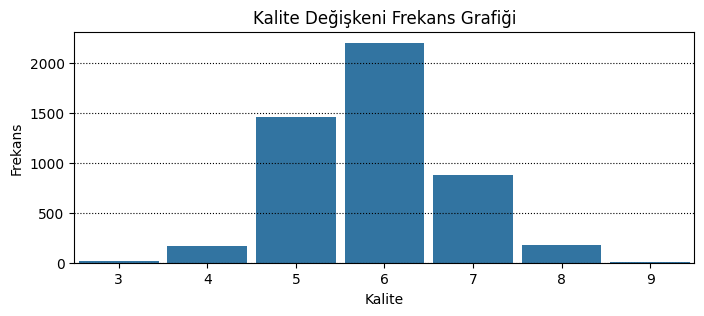

,count
Kalite,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


In [ ]:
plt.figure(figsize = (8,3))
sns.countplot(x = df.Kalite, width = 0.9, )
plt.grid(axis = "y", ls = ":", color = "black")
plt.title("Kalite Değişkeni Frekans Grafiği")
plt.ylabel("Frekans")
plt.show()
df.Kalite.value_counts()

Kalite değişkeni 7 değer almaktadır. Sınıflama algoritmalarını kullanacağımız için önce bağımlı değişkene 0'dan başlayan bir hiyerarşi numaraları veriyoruz.İlk veride 3 olan kalite değeri 0, 4 değeri 1 olacak şekilde artarak gitmektedir.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
df = pd.read_csv('wineQualityWhites.csv')
df.rename(columns={'quality': 'Kalite'}, inplace=True)
kategori = [3, 4, 5, 6, 7, 8, 9]
unique_values = sorted(df["Kalite"].unique())
ordinal = OrdinalEncoder(categories = [kategori])
df["Kalite"] = pd.to_numeric(df["Kalite"])
df["Kalite"] = df["Kalite"].fillna(df["Kalite"].median())
df["Kalite"] = ordinal.fit_transform(df["Kalite"].values.reshape(-1,1))

Değişkenler arasındaki ilişkiye yönelik bilgi almak için Korelasyon Matrisi kullanıyoruz.Veri çerçevesindeki sayısal değişkenler arasındaki korelasyonları görsel olarak temsil eden bir ısı haritası elde edersiniz. Elde edilen harita, hangi değişkenlerin birbirleriyle nasıl bir ilişkiye sahip olduğunu göstermekte, böylece veriler arasında anlamlı bağlantılar kurmanızı kolaylaştırmaktadır.

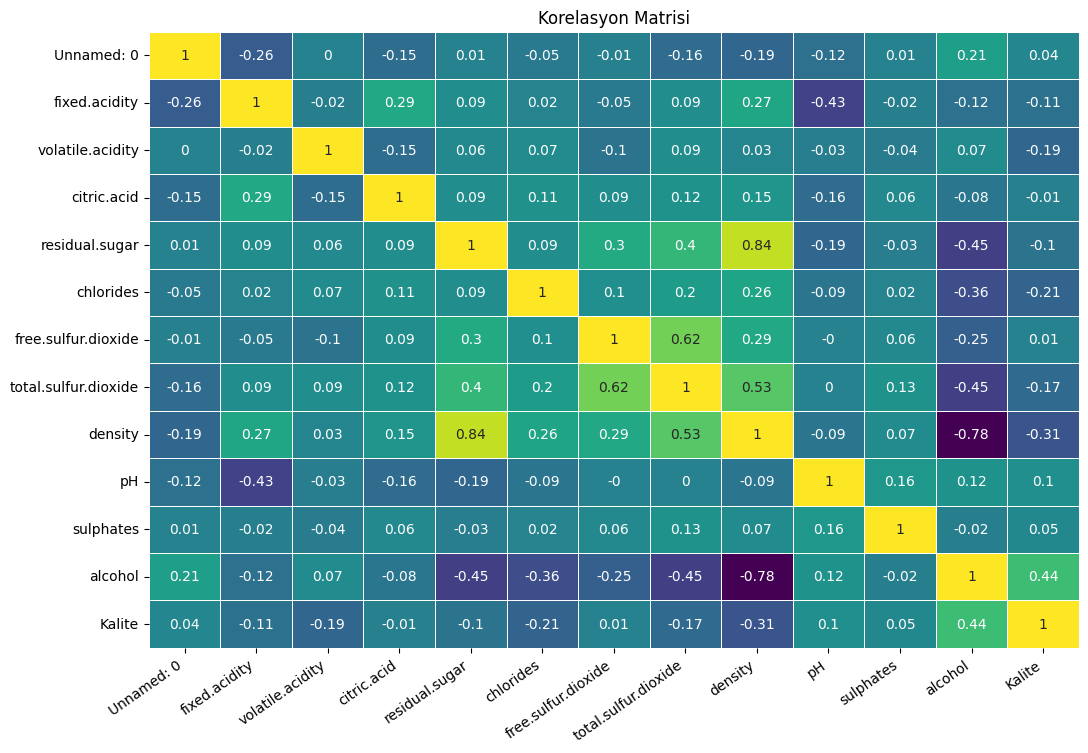

In [ ]:
cor_mat = df.corr().round(2)
plt.figure(figsize= (12,8))
sns.heatmap(cor_mat, annot = True, lw =0.5, cmap="viridis", cbar=False)
plt.title("Korelasyon Matrisi")
plt.xticks(rotation=35, ha="right")
plt.show()

Grafiğe baktığımızda, şarap kalitesiyle alkol arasında pozitif normal bir ilişki olduğu görülmektedir. Ayrıca, sabit asitlik ile pH arasında negatif korelasyon, kalan şeker ile yoğunluk arasında pozitif güçlü korelasyon ve alkol ile yoğunluk arasında negatif güçlü korelasyon vardır.

Kalite değişkeni duyusal verilere bağlı değişken olduğundan çoklu lojistik regresyon yerine ikili lojistik regresyon kullanmak çok daha sağlıklı sonuçlar almamızı sağlayacaktır. Bunun için önce kalite değerlerini 1 ve 0 olacak şekilde 2 gruba ayırılmış yeni bir değişken oluşturuyoruz.

In [ ]:
df["Kalite Durumu"] = [1 if x>5 else 0 for x in df["Kalite"]]
df["Kalite Durumu"] = [1 if x>5 else 0 for x in df["Kalite"]]
print(df["Kalite Durumu"].unique())

[0 1]


5 ve 5'ten büyük kalite puanına sahip olan örneklemler 1 (kaliteli), ve diğerleri 0 (kalitesiz) olacak şekilde düzenlenmiştir.

Bağımlı ve bağımsız değişkenlerin ayrılması, ardından eğitim ve test verisinin oluşturulması.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["Kalite","Kalite Durumu"], axis = 1)
y = df["Kalite Durumu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

Verileri ölçeklendirmek için Normalizasyon tekniğininin kullanılması, diğer adıyla Min-Max Scalling.

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**LOJİSTİK REGRESYON**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
pred = log.predict(X_test)
log_test = log.score(X_test, y_test)
print("Accuracy: {}". format(log_test))




Accuracy: 1.0


Modelimizin eğitim ve test doğruluk skoru birbirine oldukça yakındır. Model yeni veriyi yaklaşık %97 oranında doğru tahmin ediyor diyebiliriz.Accuracy:09666666666666667 dir.

Bağımsız değişkenlerin bağımlı değişken üzerinde ne derece öneme sahip olduklarını görmek için grafik çizmek için aşağıdaki kodları yazıyoruz.

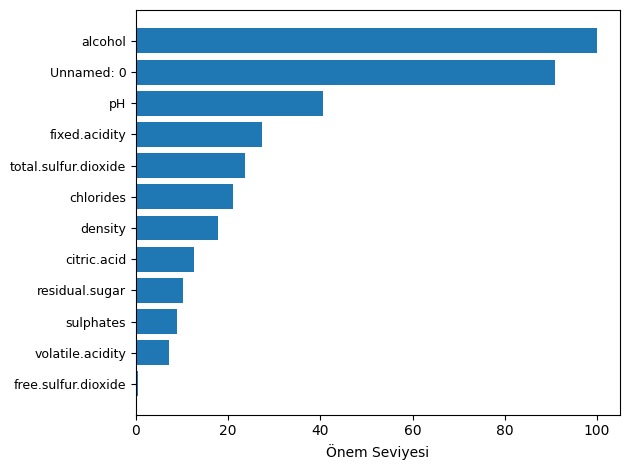

In [ ]:
import numpy as np
katsayilar = abs(log.coef_[0])
katsayilar = 100 * (katsayilar / katsayilar.max())
sirali_index = np.argsort(katsayilar)
pos = np.arange(sirali_index.shape[0])

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, katsayilar[sirali_index], align = "center")
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sirali_index], fontsize=9)
featax.set_xlabel("Önem Seviyesi")

plt.tight_layout()
plt.show()

**KNN YAKIN KOMŞU**

Önce bize en iyi sonucu verecek olan model için en yakın komşuyu kaç alacağımızı görmek içim;

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parametreler = {"n_neighbors" : range(1,30)}
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator = knn, param_grid = parametreler, cv = 10, n_jobs = -1)
grid.fit(X_train,y_train)
print(grid.best_params_)
{'n_neighbors': 4}

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


{'n_neighbors': 1}


{'n_neighbors': 4}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
knn_test = log.score(X_test, y_test)
print("Accuracy: {}". format(knn_test))


Accuracy: 1.0


Modelimizin eğitim ve test doğruluk skoru lojistik regresyon gibi birbirlerine yakın çıkmıştır.Accuracy:0.964625850340136

**DESTEK VEKTÖR MAKİNELERİ(SVM)**

C ve gamma, SVM (Destek Vektör Makinesi) algoritmasının hiperparametreleridir. C, SVM algoritmasında bir hata tercihini kontrol eder. C değeri ne kadar büyükse, model eğitim verilerine daha fazla uymaya çalışacak ve sınıflandırma hatasını en aza indirmeye çalışacaktır. Gamma ise SVM algoritmasında çekirdek fonksiyonunun genişliğini belirler. Gamma değeri ne kadar yüksekse, bir veri örneğinin birbirine yakın komşularının etkisi o kadar büyük olur.

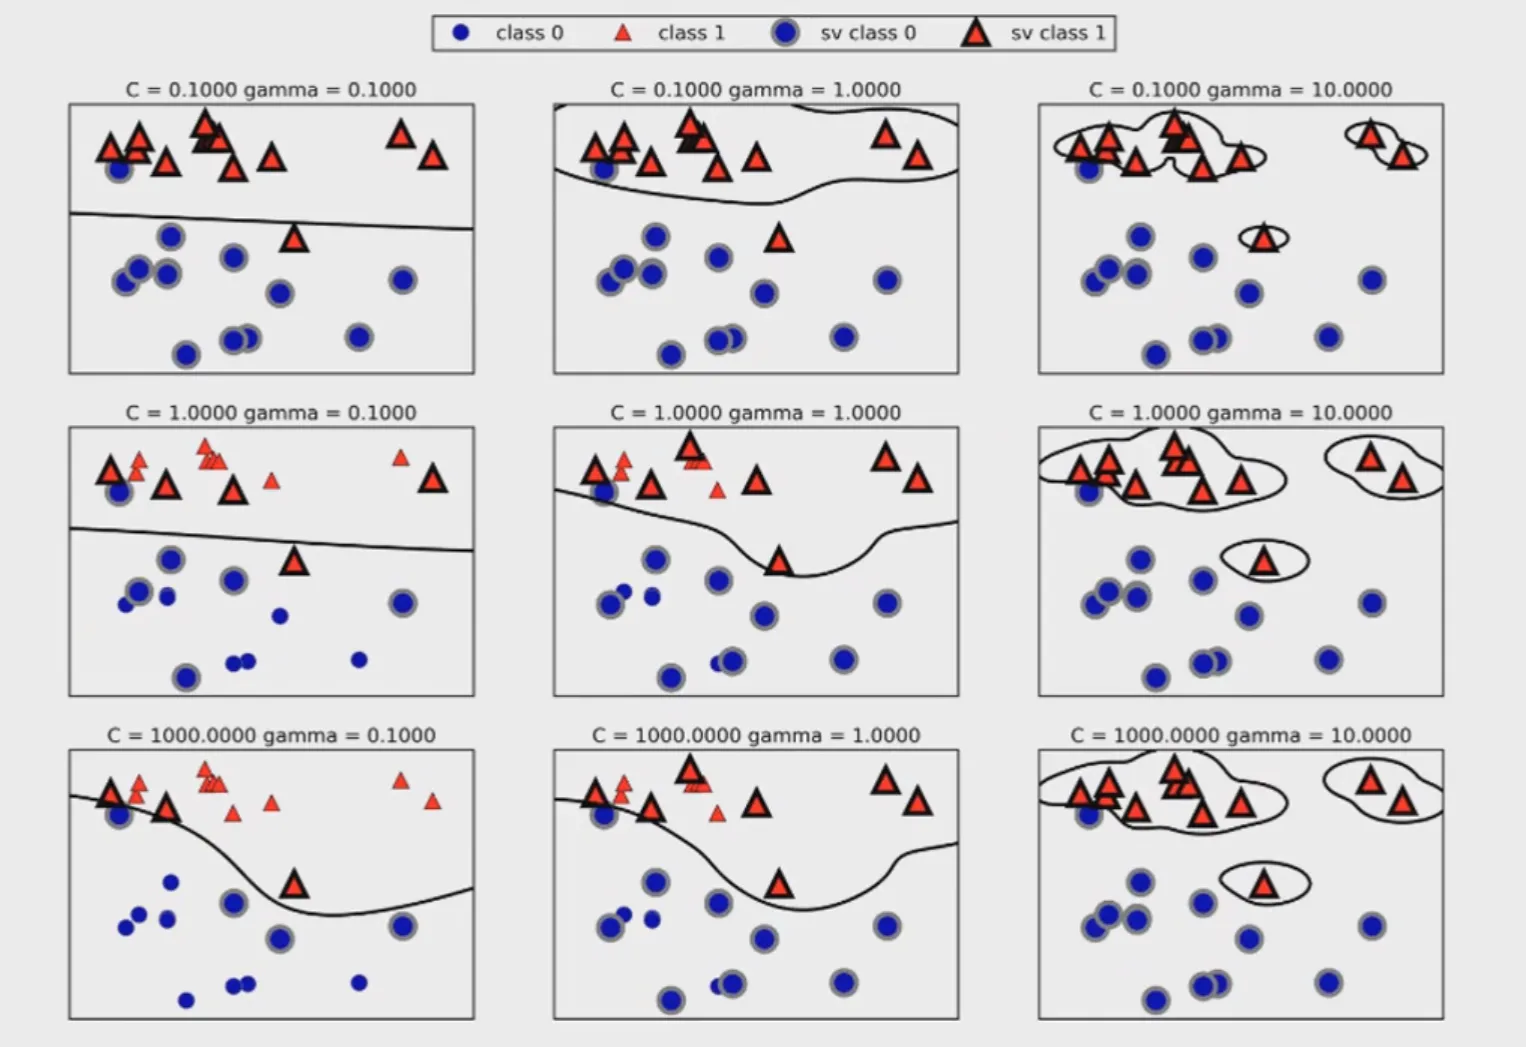

In [ ]:
from sklearn.svm import SVC
svm = SVC()
parametreler = {"C" : [0.1,1.0,10.0,100.0], "gamma" : [0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(estimator = svm, param_grid = parametreler, cv = 10, n_jobs = -1)
grid.fit(X_train,y_train)
print(grid.best_params_)
{'C': 1.0, 'gamma': 1000.0}

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


{'C': 0.1, 'gamma': 0.1}


{'C': 1.0, 'gamma': 1000.0}

In [ ]:
svm = SVC(random_state = 0, C = 1.0, gamma = 1000.0)
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
svm_test = svm.score(X_test, y_test)
print("Accuracy: {}".format(svm_test))

Accuracy: 1.0


Eğitim ve test doğruluk skoru birbirine yakın ve oldukça yüksek çıktığı görülüyor.Accuracy:0.9775510204081632

**NAİVE BAYES**
BernoulliNB, Naive Bayes sınıflandırma algoritmasının bir türüdür. Bu algoritma, özellikle ikili (binary) özelliklere sahip veri setleri üzerinde sınıflandırma yapmak için kullanılır. BernoulliNB, veri setindeki özelliklerin varlık veya yokluk durumunu temsil eden Bernoulli dağılımını temel alır. Örneğin; Var/Yok, 1/0, Evet/Hayır gibi.

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
pred = bnb.predict(X_test)
bnb_test = bnb.score(X_test, y_test)
print("Accuracy: {}".format(bnb_test))

Accuracy: 1.0


Modelimizin eğitim ve test doğruluk skoru lojistik regresyonla aynı çıkmıştır.Accuracy:0.9666666666666667

**KARAR AĞACI**
Modeli yalın bir şekilde kurduğumuz zaman overfitting durumla karşılaşıyoruz. Bu yüzden karar ağacımızda budama işlemi yapacağız. Bu işlemi yapmak için karar ağacı algoritmasının “max_depth” parametresini değiştireceğiz.

“max_depth” karar ağacının derinliğini sınırlayan bir parametredir. Derinlik, kök düğümden bir yaprak düğüme ulaşmak için geçilen düğüm sayısını ifade eder. “max_depth” parametresi, ağacın büyüklüğünü kontrol ederek overfitting yani aşırı öğrenmeyi engeller ve modelin daha genelleştirilebilir olmasını sağlar.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
parametreler = {"max_depth": range(1,50)}
grid = GridSearchCV(dtc, param_grid = parametreler, cv = 10, n_jobs = -1)
grid.fit(X_train, y_train)
print(grid.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


{'max_depth': 1}


In [ ]:
dtc = DecisionTreeClassifier(random_state = 0, max_depth = 1)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
dtc_test = dtc.score(X_test, y_test)
print("Accuracy: {}".format(dtc_test))

Accuracy: 1.0


Sonuç olarak eğitim ve test skorları birbirine oldukça yakın ve yüksek.Accuracy:0.9666666666666667

**RASGELE ORMAN**
Bu model de yalın bir şekilde çalıştırıldığında aşırı öğrenme problemiyle karşılaştık. Bu yüzden modelin parametreleriyle oynama yapacağız. Bu işlemi yapmak için algoritmanın ‘max_depth’, ‘max_features’ ve ‘min_samples_leaf’ parametresini değiştireceğiz.

Karar ağacı veya rastgele orman algoritmalarında, her bir düğümde veri kümesi üzerinde bir karar kuralı oluşturulurken bir özellik seçilir. Bu seçim sürecinde, ‘max_features’ parametresi önemli bir rol oynar. ‘max_features’ değeri, her bir düğümde değerlendirilecek olan en fazla özellik sayısını sınırlar.

‘min_samples_leaf’ değeri, yaprak düğümünde gereken en az örnek sayısını belirler. Yani, bir yaprak düğümünün oluşturulabilmesi için, bu düğümde en az ‘min_samples_leaf’ sayısı kadar örneğin bulunması gerekmektedir.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
parametreler = {"max_features": [1, 2, 4, 6],
                "min_samples_leaf" : [1,2,3,4],
                "max_depth": range(1,20)}
grid = GridSearchCV(rfc, param_grid = parametreler, cv = 10, n_jobs = -1)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 16, 'max_features': 1, 'min_samples_leaf': 1}

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


{'max_depth': 1, 'max_features': 1, 'min_samples_leaf': 1}


{'max_depth': 16, 'max_features': 1, 'min_samples_leaf': 1}

In [ ]:
rfc = RandomForestClassifier(random_state = 0,
                             max_features = 1,
                             min_samples_leaf = 1,
                             max_depth = 16)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
rfc_test = rfc.score(X_test, y_test)
print("Accuracy: {}".format(rfc_test))


Accuracy: 1.0


Test ve eğitim skoru oldukça yüksek ve ortalama hata karesi oldukça düşük çıktı.Accuracy:0.9782312925170068

Bağımsız değişkenlerin bağımlı değişken üzerinde ne derece öneme sahip olduklarını görmek için grafik çiziyoruz.

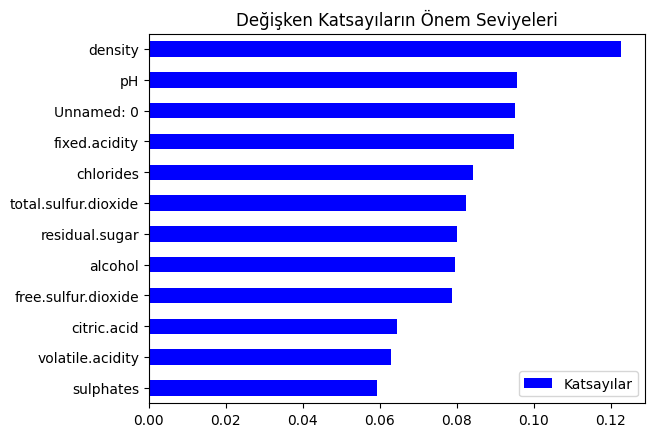

In [ ]:
katsayılar = pd.DataFrame({"Katsayılar":rfc.feature_importances_},
                          index = X.columns)
katsayılar.sort_values(by = "Katsayılar", axis = 0, ascending = True).plot(kind ="barh", color = "blue")
plt.title("Değişken Katsayıların Önem Seviyeleri")
plt.show()